# Plot instantaneous hub-height velocities

In [1]:
# Add any possible locations of amr-wind-frontend here
amrwindfedirs = ['/projects/wind_uq/lcheung/amrwind-frontend/',
                  '/ccs/proj/cfd162/lcheung/amrwind-frontend/',
                ]
import sys, os, shutil, io
import numpy as np
for x in amrwindfedirs: sys.path.insert(1, x)

from functools import partial
import matplotlib.pyplot as plt

# Make all plots inline 
%matplotlib inline

import postproengine as ppeng

/ascldap/users/lcheung/.local/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/ascldap/users/lcheung/.local/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
# Load ruamel or pyyaml as needed
try:
    import ruamel.yaml
    yaml = ruamel.yaml.YAML(typ='unsafe', pure=True)
    useruamel=True
    loaderkwargs = {'Loader':yaml.RoundTripLoader}
    dumperkwargs = {'Dumper':yaml.RoundTripDumper, 'indent':4, 'default_flow_style':False}
    Loader=yaml.load
except:
    import yaml as yaml
    useruamel=False
    loaderkwargs = {}
    dumperkwargs = {'default_flow_style':False }
    Loader=yaml.safe_load
    
    
def formatTfig(fig,ax):
    ax.set_xlim([300, 301])
    return
ppeng.formatTfig = formatTfig

In [3]:
yamlstring="""
globalattributes:
  verbose: False
  executeorder:
  - instantaneousplanes

instantaneousplanes:
  - name: Domain
    ncfile: /gpfs/lcheung/HFM/exawind-benchmarks/convective_abl/post_processing/XYdomain_090_00000.nc
    iters:  []
    times: [1000, 5000, 10000, 15000]
    iplane: 0
    xaxis: x
    yaxis: y
    # --- optional stuff here ---
    plot:
      title: 'Convective ABL $U_h$ T={time:0.1f}s'
      plotfunc: "lambda db,i: np.sqrt(db['velocityx'][i]**2 + db['velocityy'][i]**2)"
      clevels: 'np.linspace(0, 14, 141)'
      xlabel: 'X [m]'
      ylabel: 'Y [m]'
      cbar_nticks: 15
      fontsize: 12
      figsize: [6,5]
      dpi: 125
      savefile: '../results/XYdomain_{time:05.0f}.png'
"""
f = io.StringIO(yamlstring)
yamldict = Loader(f, **loaderkwargs)

Initialized instantaneousplanes
Running instantaneousplanes
extracting iter 20
extracting iter 100
extracting iter 200
extracting iter 300
Initialized plot inside instantaneousplanes
Executing plot


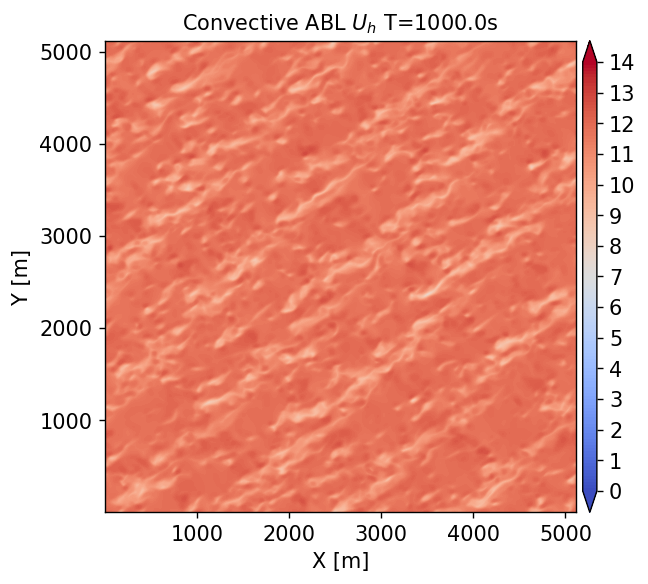

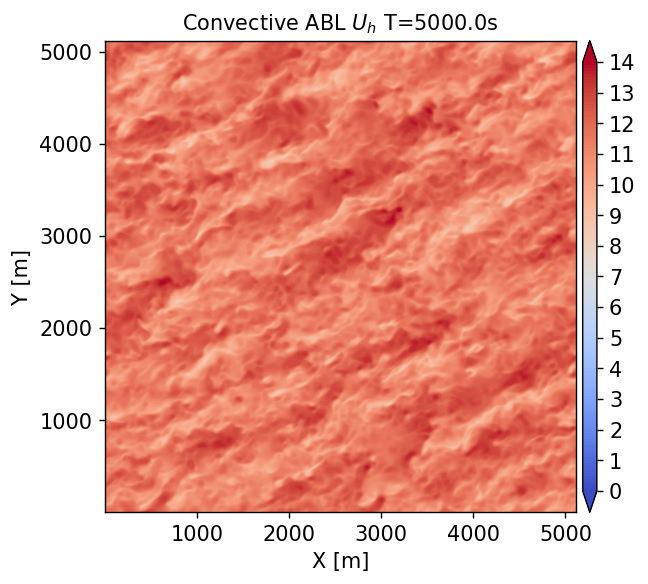

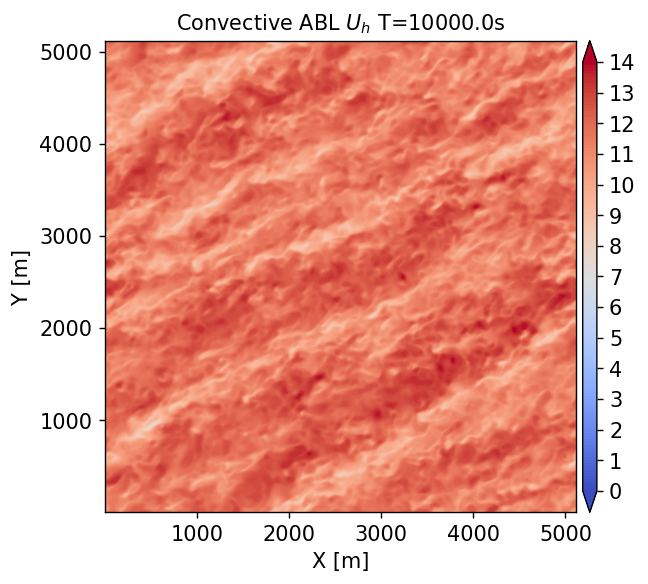

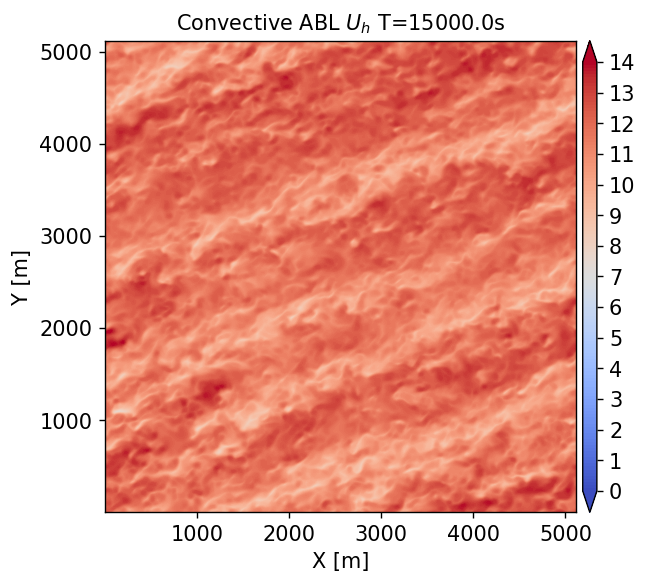

In [4]:
# Run the driver
ppeng.driver(yamldict, verbose=True)